In [ ]:
!pip install albumentations

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
import zipfile
import random
import albumentations
import subprocess
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, Input
from tensorflow.keras.optimizers import Adam
from keras.utils import plot_model
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.applications.resnet_v2 import preprocess_input as resnet_preprocess_input
from tensorflow.keras.applications.inception_v3 import preprocess_input as inceptionv3_preprocess_input
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input as mobilenetv2_preprocess_input
from tensorflow.keras.models import load_model
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from IPython.display import FileLink, display

In [ ]:
sns.set(rc={'axes.facecolor': 'gainsboro'}, style='darkgrid')



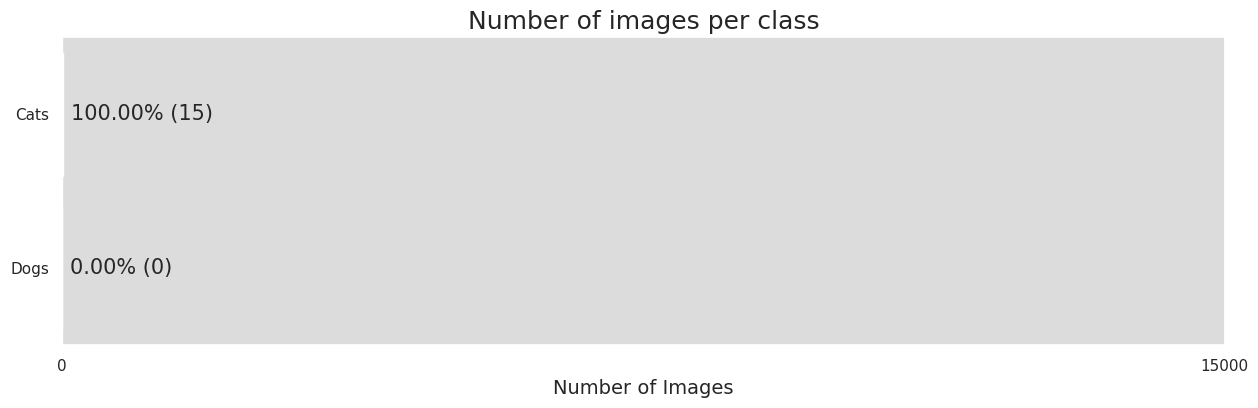

In [10]:
import os
import seaborn as sns
import matplotlib.pyplot as plt

zip_path = '/content/svm/sampleSubmission (1).csv'

# Specify the directory where we want to extract the contents of the zip file

# After extracting, specify the directory of the actual images
actual_extracted_path = '/content/svm/train'

# List all filenames in the actual extracted directory
filenames = os.listdir(actual_extracted_path)

# Separate filenames into cats and dogs
cat_images = [filename for filename in filenames if "cat" in filename]
dog_images = [filename for filename in filenames if "dog" in filename]

# Get the count of each class
cat_count = len(cat_images)
dog_count = len(dog_images)

# Calculate the percentages
total_images = cat_count + dog_count
cat_percentage = (cat_count / total_images) * 100
dog_percentage = (dog_count / total_images) * 100

# Plotting
labels = ['Cats', 'Dogs']
counts = [cat_count, dog_count]
percentages = [cat_percentage, dog_percentage]

# Set the figure size
plt.figure(figsize=(15, 4))

# Create a horizontal bar plot
ax = sns.barplot(y=labels, x=counts, orient='h', color='#33312b')

# Set x-axis interval
ax.set_xticks([0, 15000])

# Annotate each bar with the count and percentage
for i, p in enumerate(ax.patches):
    width = p.get_width()
    ax.text(width + 100, p.get_y() + p.get_height()/2.,
            '{:1.2f}% ({})'.format(percentages[i], counts[i]),
            va="center", fontsize=15)

# Set the x-label for the plot
plt.xlabel('Number of Images', fontsize=14)

# Set the title and show the plot
plt.title("Number of images per class", fontsize=18)
plt.show()


In [11]:
import os
import cv2
import numpy as np

# Define the directory where the images are located
actual_extracted_path = '/content/svm/train'

# List all filenames in the actual extracted directory
filenames = os.listdir(actual_extracted_path)

# Initialize lists to store heights and widths
heights = []
widths = []

# Initialize a set to store unique dimensions and channels
unique_dims = set()
unique_channels = set()

# Loop over filenames and check dimensions
for filename in filenames:
    img = cv2.imread(os.path.join(actual_extracted_path, filename))
    if img is not None:
        # Add the dimensions (height, width, channels) to the set
        unique_dims.add((img.shape[0], img.shape[1]))

        # Add the channels to the set
        unique_channels.add(img.shape[2])

        # Append heights and widths for statistical calculations
        heights.append(img.shape[0])
        widths.append(img.shape[1])

# Check if all images have the same dimension
if len(unique_dims) == 1:
    print(f"All images have the same dimensions: {list(unique_dims)[0]}")
else:
    print(f"There are {len(unique_dims)} different image dimensions in the dataset.")
    print(f"Min height: {min(heights)}, Max height: {max(heights)}, Mean height: {np.mean(heights):.2f}")
    print(f"Min width: {min(widths)}, Max width: {max(widths)}, Mean width: {np.mean(widths):.2f}")

# Check if all images have the same number of channels
if len(unique_channels) == 1:
    channel = list(unique_channels)[0]
    if channel == 3:
        print("All images are color images.")
    else:
        print("All images have the same number of channels, but they are not color images.")
else:
    print("Images have different numbers of channels.")


There are 12 different image dimensions in the dataset.
Min height: 92, Max height: 500, Mean height: 332.47
Min width: 169, Max width: 500, Mean width: 391.40
All images are color images.


In [19]:
import pandas as pd

# Read the CSV file
images = pd.read_csv('/content/svm/sampleSubmission (1).csv')
print(images)


          id  label
0          1      0
1          2      0
2          3      0
3          4      0
4          5      0
...      ...    ...
12495  12496      0
12496  12497      0
12497  12498      0
12498  12499      0
12499  12500      0

[12500 rows x 2 columns]


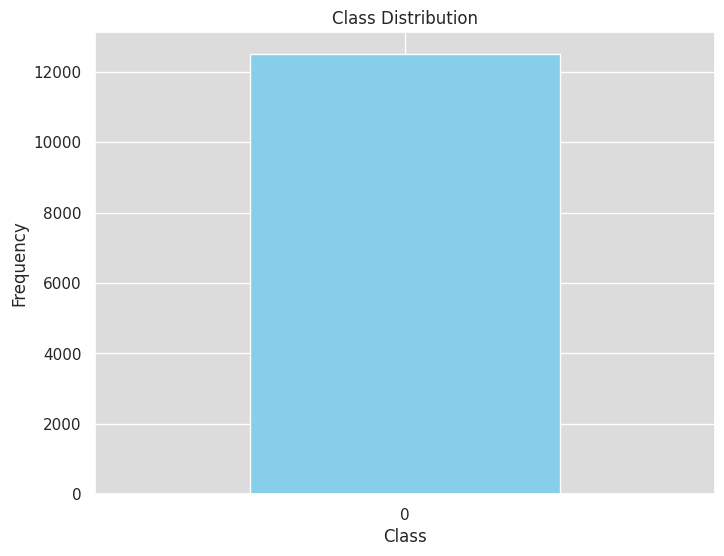

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file
data = pd.read_csv('/content/svm/sampleSubmission (1).csv')

# Count the frequency of each class label
class_counts = data['label'].value_counts()

# Plotting the class distribution
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color='skyblue')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()


In [32]:
import pandas as pd
import os
from skimage.transform import resize
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


In [46]:
df=pd.read_csv('/content/svm/sampleSubmission (1).csv')

df.shape

(12500, 2)

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
path = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [50]:
df.describe()


,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


In [51]:
df.dtypes
for x in df:
    if df[x].dtypes == "int64":
        df[x] = df[x].astype(float)
        print (df[x].dtypes)

float64
float64
float64
float64
float64
float64
float64
float64


In [55]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
sc = StandardScaler()

# Fit the StandardScaler to the training data and transform it
X_train_std = sc.fit_transform(X_train)

# Transform the testing data using the fitted StandardScaler
X_test_std = sc.transform(X_test)

# Now you can use X_train_std and X_test_std for training and testing your model
